# Q.1: Import data and check null values, column info, and descriptive statistics of the data.

In [24]:
import pandas as pd

df=pd.read_csv('Instagram-Reach.csv')

# Checking Null values

In [25]:
df.isnull().sum()

Date               0
Instagram reach    0
dtype: int64

# Column info

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


# Descriptive Statistics

In [27]:
df.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


# Q.2: You can convert the Date column into datetime datatype to move forward.

In [28]:
df['Date']=pd.to_datetime(df['Date'])

# Q.3: Analyze the trend of Instagram reach over time using a line chart

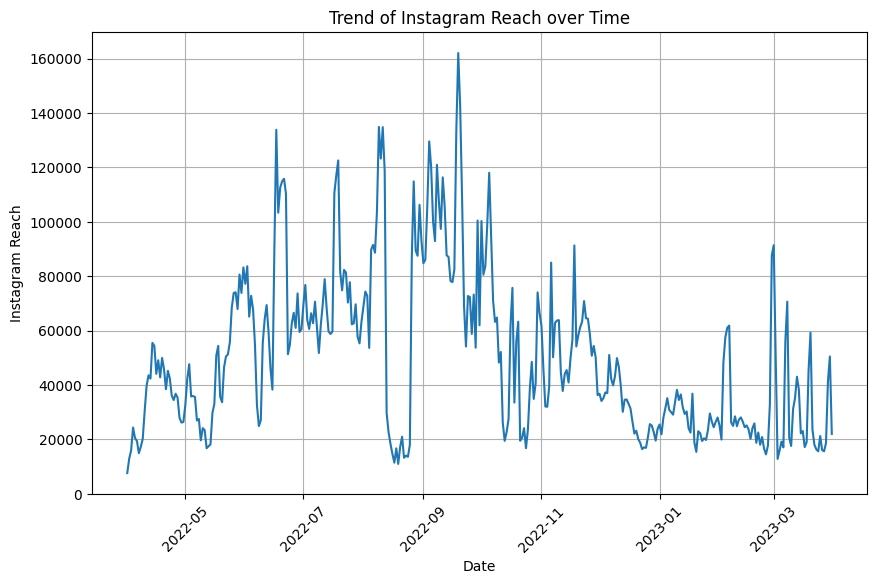

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Instagram reach'])
plt.title('Trend of Instagram Reach over Time')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Q.4: Analyze Instagram reach for each day using a bar chart.

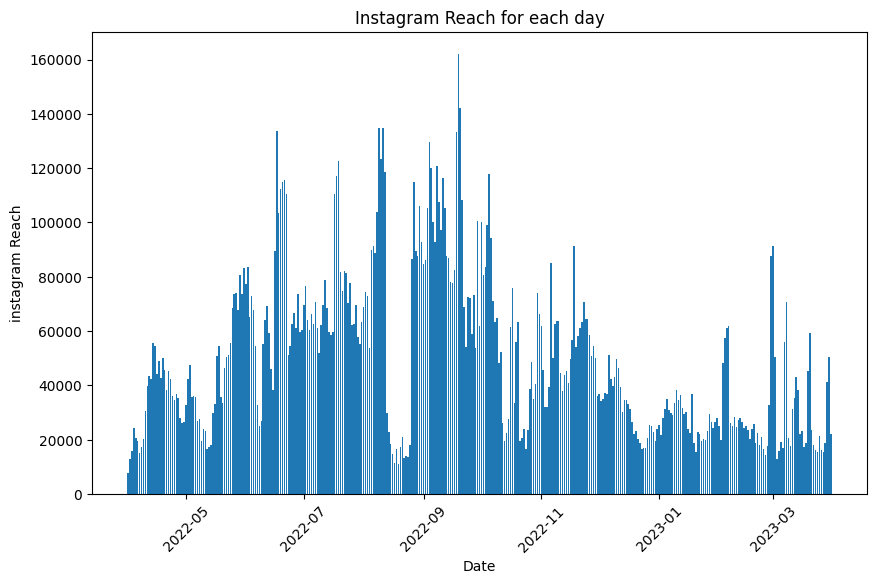

In [30]:
plt.figure(figsize=(10,6))
plt.bar(df['Date'], df['Instagram reach'])
plt.title('Instagram Reach for each day')
plt.xlabel('Date')
plt.ylabel('instagram Reach')
plt.xticks(rotation=45)
plt.show()

# Q.5: Analyze the distribution of Instagram reach using a box plot.

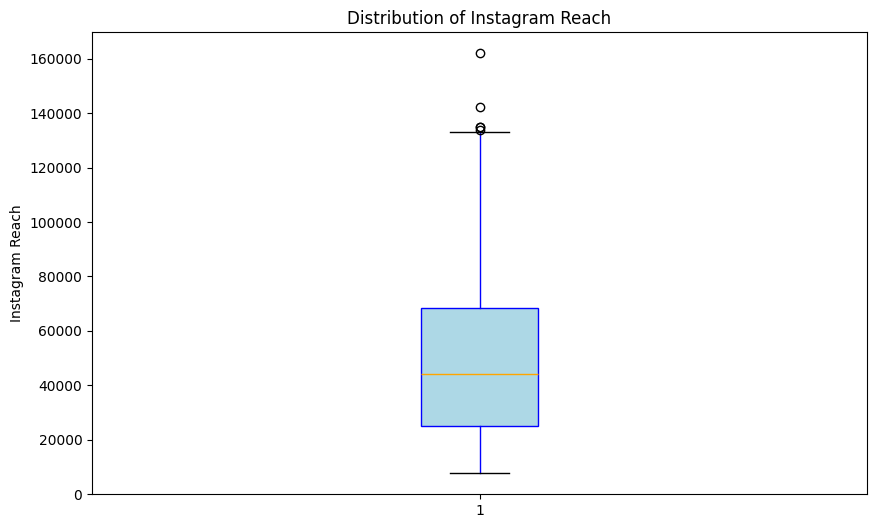

In [31]:
plt.figure(figsize=(10,6))
plt.boxplot(df['Instagram reach'],  patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'), flierprops=dict(marker='o', color='red', markersize=6), 
            medianprops=dict(color='orange'))
plt.title('Distribution of Instagram Reach')
plt.ylabel('Instagram Reach')
plt.show()

# Q.5: Now create a day column and analyze reach based on the days of the week. To create a day column, you can use the python method to extract the day of the week from the Date column.

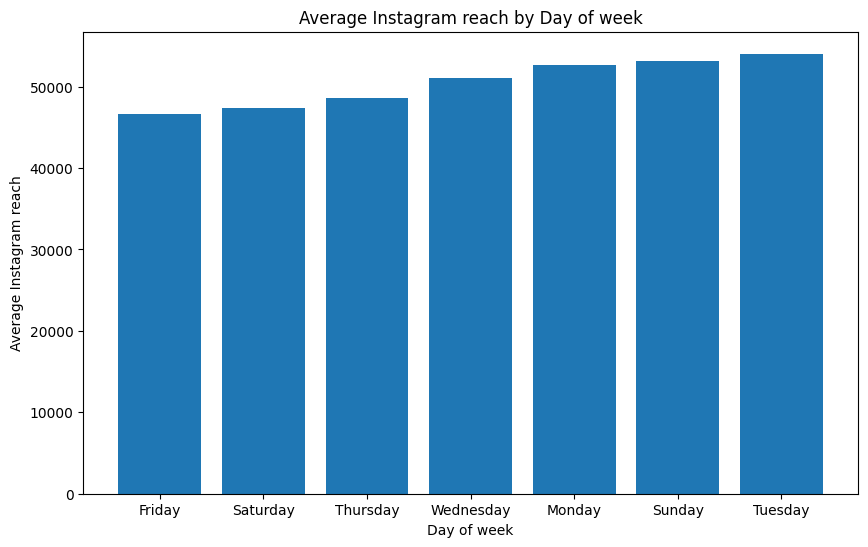

In [32]:
df['Day of week']=df['Date'].dt.day_name()
day_reach_summary=df.groupby('Day of week')['Instagram reach'].mean().sort_values()

plt.figure(figsize=(10,6))
plt.bar(day_reach_summary.index, day_reach_summary.values)
plt.title('Average Instagram reach by Day of week')
plt.xlabel('Day of week')
plt.ylabel('Average Instagram reach')
plt.show()

# Q.6: Now analyze the reach based on the days of the week. For this, you can group the DataFrame by the Day column and calculate the mean, median, and standard deviation of the Instagram reach column for each day.

In [33]:
day_reach_stats=df.groupby('Day of week')['Instagram reach'].agg(['mean', 'median', 'std'])
print("Instagram Reach Statistics by Day of the Week:")
print(day_reach_stats)

Instagram Reach Statistics by Day of the Week:
                     mean   median           std
Day of week                                     
Friday       46666.849057  35574.0  29856.943036
Monday       52621.692308  46853.0  32296.071347
Saturday     47374.750000  40012.0  27667.043634
Sunday       53114.173077  47797.0  30906.162384
Thursday     48570.923077  39150.0  28623.220625
Tuesday      54030.557692  48786.0  32503.726482
Wednesday    51017.269231  42320.5  29047.869685


# Q.7: Now create a bar chart to visualize the reach for each day of the week.

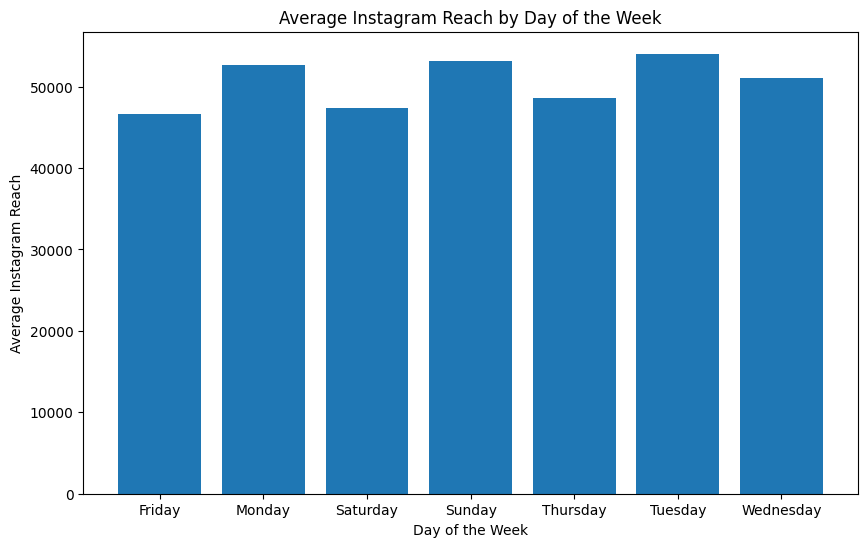

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(day_reach_stats.index, day_reach_stats['mean'])
plt.title('Average Instagram Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Instagram Reach')
plt.show()

# Q.8: Check the Trends and Seasonal patterns of Instagram reach.

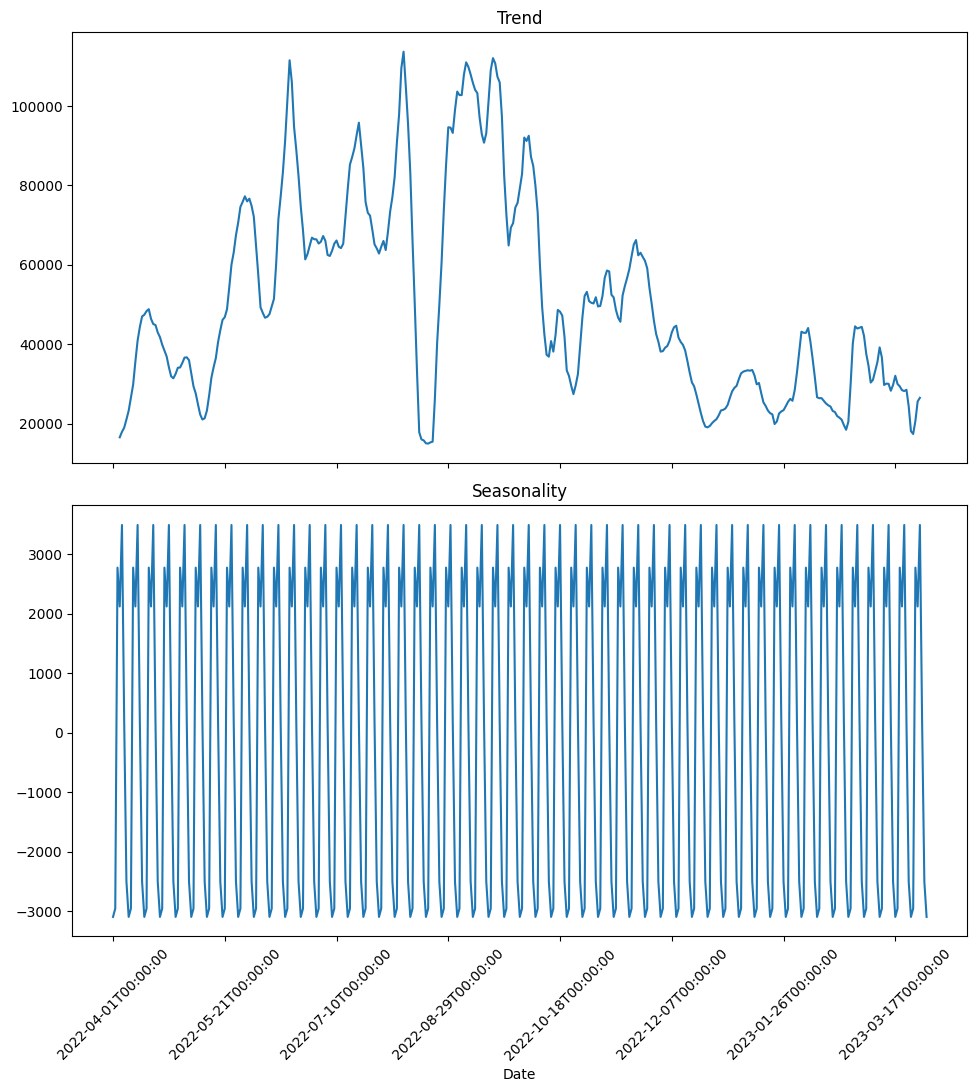

In [35]:
import statsmodels.api as sm
import numpy as np

df=pd.read_csv('Instagram-Reach.csv')

df.set_index('Date', inplace=True)

decomposition=sm.tsa.seasonal_decompose(df['Instagram reach'], model='additive', period=7)

fig, (ax1, ax2)=plt.subplots(2, 1, figsize=(10,10), sharex=True)


decomposition.trend.plot(ax=ax1, title='Trend')

decomposition.seasonal.plot(ax=ax2, title='Seasonality')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Q.9: You can use the SARIMA model to forecast the reach of the Instagram account. You need to find p, d, and q values to forecast the reach of Instagram. To find the value of d, you can use the autocorrelation plot, and to find the value of q, you can use a partial autocorrelation plot. The value of d will be 1. You have to visualize an autocorrelation plot to find the value of p, partial autocorrelation plot to find the value of q.

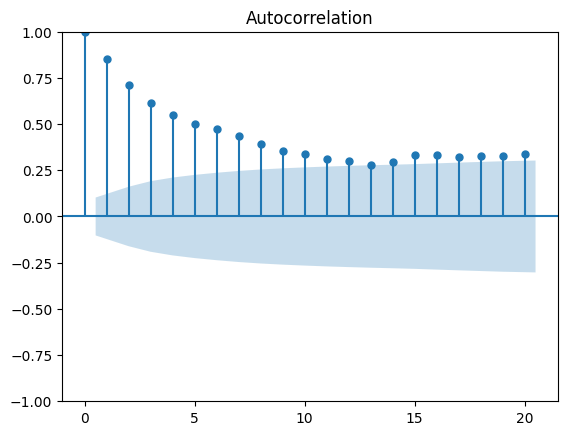

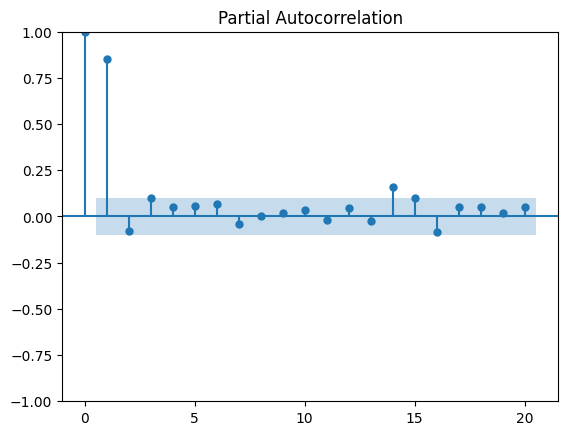

In [36]:
df=pd.read_csv('Instagram-Reach.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

sm.graphics.tsa.plot_acf(df['Instagram reach'], lags=20)
plt.show()

sm.graphics.tsa.plot_pacf(df['Instagram reach'], lags=20, method='ywm')
plt.show()


# Q.10: You have to train a model using SARIMA and make predictions.

C:\Users\khati\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\khati\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error:  415840971.35903454


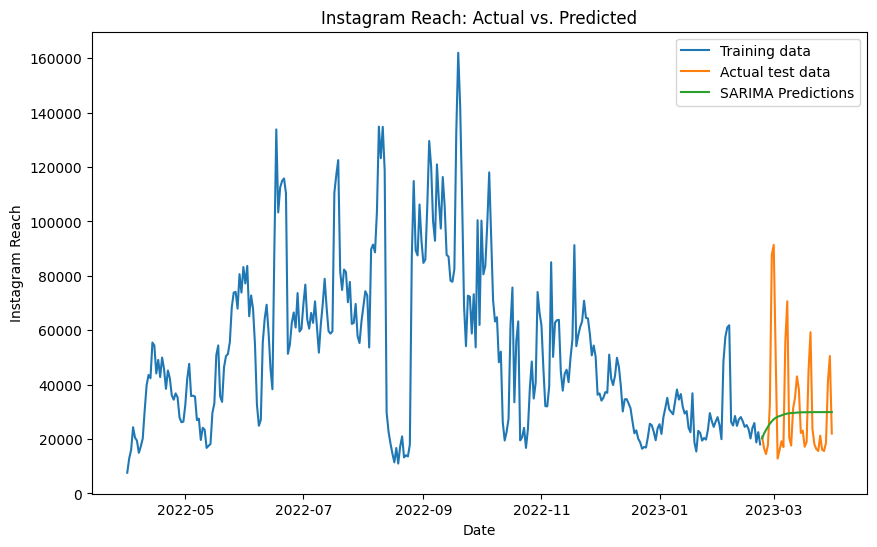

In [37]:
from sklearn.metrics import mean_squared_error

df=pd.read_csv('Instagram-Reach.csv')
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

train_size=int(0.9 * len(df))
train, test=df[:train_size], df[train_size:]

p, d, q=1, 1, 1
P, D, Q, s=1, 0, 1, 7

model=sm.tsa.SARIMAX(train['Instagram reach'],
                     order=(p, d, q),
                     seasonal_order=(P, D, Q, s),
                     enforce_stationarity=False,
                     enforce_invertibility=False)

result=model.fit()

forecast_steps=len(test)
predications=result.forecast(steps=forecast_steps)

mse=mean_squared_error(test['Instagram reach'], predications)
print('Mean Squared Error: ', mse)

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Instagram reach'], label='Training data')
plt.plot(test.index, test['Instagram reach'], label='Actual test data')
plt.plot(test.index, predications, label='SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach: Actual vs. Predicted')
plt.legend()
plt.show()